# Gradient descent VS Runge-Kutta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gradient_ascent_functions import * # the gradient ascent functions

## Gradient Descent method

### Processing the test dataset

The values of `Sex` and `Embarked` (port of embarkation) are transformed into integeres with the following correspondence:
- Sex:
    - `male` -> `0`
    - `female` -> `1`
- Embarked:
    - `C` -> `-1`
    - `Q` -> `0`
    - `S` -> `1`

In [2]:
# Importing the data and dropping features uncorrelated with survival outcome
unprocessed_training_dataset = pd.read_csv("train.csv", index_col='PassengerId')
training_dataset = unprocessed_training_dataset.drop(columns=["Ticket", 'Cabin', 'Name'])

#Normalizing with the mean the Age and Fare values
training_dataset['Age'] = ((training_dataset['Age'] - training_dataset['Age'].mean()) / training_dataset['Age'].max())
training_dataset['Fare'] = ((training_dataset['Fare'] - training_dataset['Fare'].mean()) / training_dataset['Fare'].max())

# Droppig passangers with missing values
training_dataset = training_dataset.dropna(subset=["Embarked", "Age"])

# Discretizing the `Sex` and `Embarked` values
training_dataset['Sex'] = training_dataset['Sex'].replace(to_replace=["male", "female"], value=[0, 1])
training_dataset['Embarked'] = training_dataset['Embarked'].replace(to_replace=["C", "Q", "S"], value=[-1, 0, 1])

# Transforming the dataset in numpy arrays to implement the gradient ascent
training_data_matrix = training_dataset.drop(columns='Survived').to_numpy()
target_array = training_dataset['Survived'].to_numpy().reshape((-1, 1))

# adding a column on ones for to the data matrix corresponding to the coventional x0 feture
column_of_ones = np.ones(shape=(training_data_matrix.shape[0], 1))
training_data_matrix = np.hstack((column_of_ones, training_data_matrix))

# Visualizing the first elements of the training_dataset
training_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,-0.096239,1,0,-0.048707,1
2,1,1,1,0.103761,1,0,0.076277,-1
3,1,3,1,-0.046239,0,0,-0.047390,1
4,1,1,1,0.066261,1,0,0.040786,1
5,0,3,0,0.066261,0,0,-0.047146,1


### Computing the paramenters

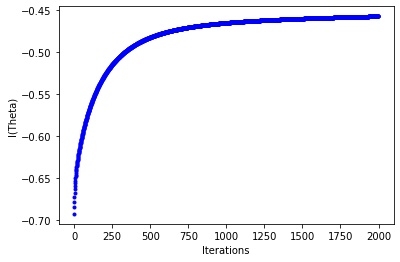

In [3]:
# Initialize theta0
theta0 = np.zeros((training_data_matrix.shape[1], 1)) # 1dimensional verical array of shape (8, 1) 

# Run Gradient Ascent method
n_iter=2000
theta_final, log_l_history = gradient_ascent(theta0, training_data_matrix, target_array, lr=.05 , num_steps=n_iter)

# Plotting the log likelihood over iterations
fig,ax = plt.subplots(num=2)
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

### Processing the test set

In [4]:
# Importing the data and dropping features uncorrelated with survival outcome
unprocessed_test_dataset = pd.read_csv("test.csv", index_col='PassengerId')
test_dataset = unprocessed_test_dataset.drop(columns=["Ticket", 'Cabin', 'Name'])

#Normalizing with the mean the Age and Fare values
test_dataset['Age'] = ((test_dataset['Age'] - test_dataset['Age'].mean()) / test_dataset['Age'].max())
test_dataset['Fare'] = ((test_dataset['Fare'] - test_dataset['Fare'].mean()) / test_dataset['Fare'].max())

# Droppig passangers with missing values
test_dataset = test_dataset.dropna(subset=["Embarked", "Age"])

# Discretizing the `Sex` and `Embarked` values
test_dataset['Sex'] = test_dataset['Sex'].replace(to_replace=["male", "female"], value=[0, 1])
test_dataset['Embarked'] = test_dataset['Embarked'].replace(to_replace=["C", "Q", "S"], value=[-1, 0, 1])

# Transforming the dataset in numpy arrays to implement the gradient ascent
test_data_matrix = test_dataset.to_numpy()

# adding a column on ones for to the data matrix corresponding to the coventional x0 feture
column_of_ones = np.ones(shape=(test_data_matrix.shape[0], 1))
test_data_matrix = np.hstack((column_of_ones, test_data_matrix))

### Computing the predictions

In [5]:
# Computing the predictions and storing them into an array
survived_array = predictions(test_data_matrix, theta_final).flatten()

# Inserting the predictions into the Test Dataframe
Survived_series = pd.Series(data=survived_array, index=test_dataset.index)
test_dataset.insert(0, "Survived", Survived_series)
test_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,0,0.055624,0,0,-0.054258,0
893,0,3,1,0.220097,1,0,-0.055877,1
894,0,2,0,0.417466,0,0,-0.050631,0
895,0,3,0,-0.043060,0,0,-0.052632,1
896,1,3,1,-0.108850,1,1,-0.045556,1
